In [10]:
import acquire
import prepare
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [11]:
df = acquire.get_titanic_data()

In [12]:
df = prepare.prep_titanic_data(df)

In [13]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,35.0,0,0,8.0500,S,Third,Southampton,1,3


In [14]:
df = df[pd.notna(df.age)]

In [15]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df[['survived']])

In [16]:
train_df.survived.value_counts()

0    296
1    203
Name: survived, dtype: int64

In [17]:
test_df.survived.value_counts()

0    128
1     87
Name: survived, dtype: int64

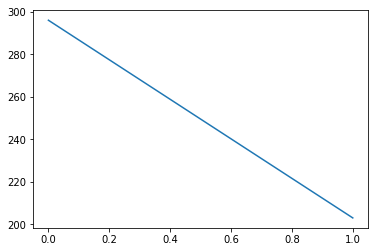

In [18]:
train_df.survived.value_counts().plot()

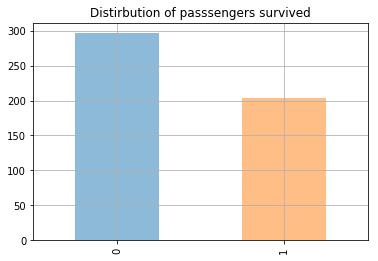

In [19]:
train_df.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


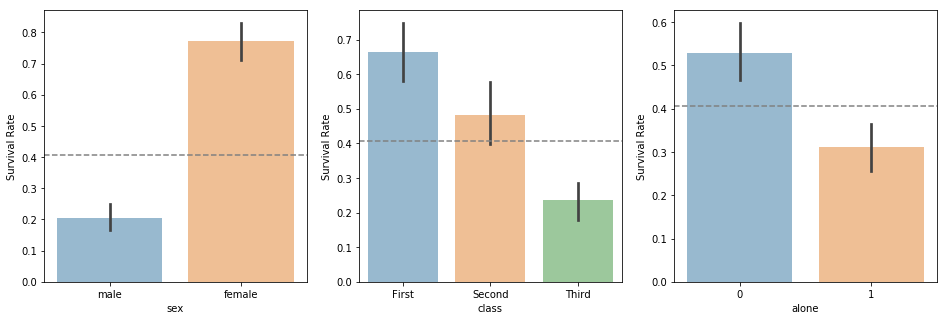

In [20]:
features = ['sex', 'class', 'alone']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

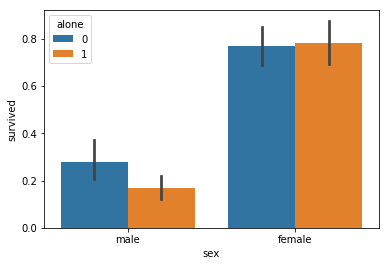

In [21]:
sns.barplot('sex', 'survived', data=train_df, hue='alone')

In [22]:
train_df.groupby(['sex', 'alone'])['survived'].count()
pd.crosstab(train.sex, train.alone, margins=True).style.background_gradient(cmap='YlOrRd')

NameError: name 'train' is not defined

In [ ]:
features = ['sex', 'class', 'embarked']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [23]:
train_df_family = train_df[train_df.alone == 0]
pd.crosstab(train_df_family['class'], train_df_family.embarked, margins=True)


embarked,C,Q,S,All
class,,,,
First,24,2,46,72
Second,8,0,50,58
Third,16,5,68,89
All,48,7,164,219


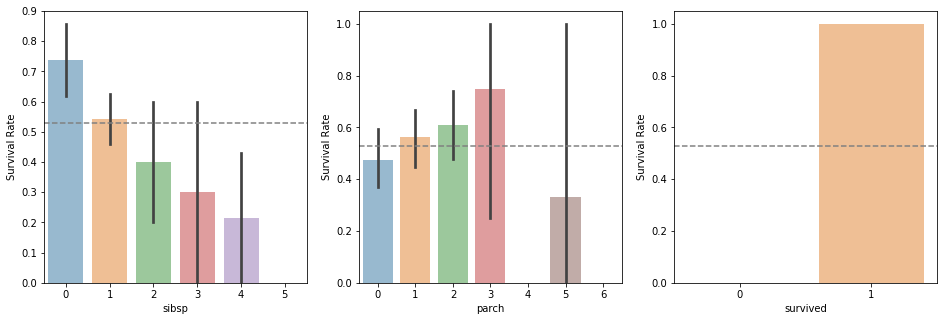

In [24]:
features = ['sibsp', 'parch', 'survived']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

survival_rate = train_df_family.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train_df_family, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

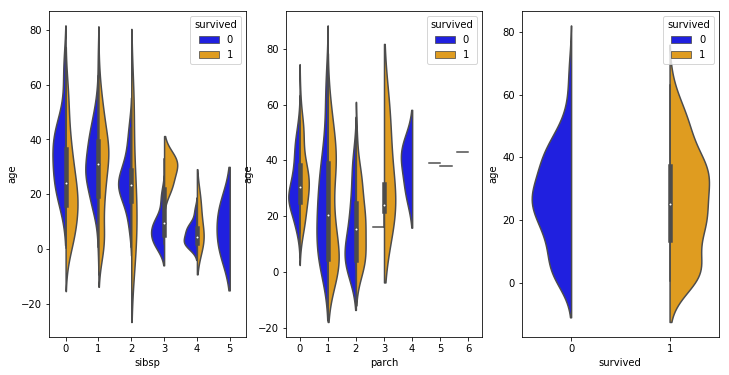

In [25]:
# 3. violin plot
features = ['sibsp', 'parch', 'survived']
feature_count = range(len(features))

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'age', hue='survived',
        data=train_df_family, split=True, ax=ax[i], palette=['blue','orange'])

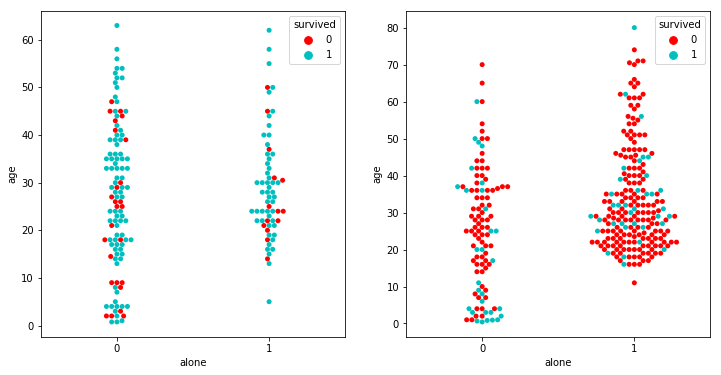

In [26]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

sns.swarmplot(x='alone', y='age', hue='survived',
            palette=['r', 'c', 'y'], ax = ax[0], data=train_df[train_df['sex']=='female'])
sns.swarmplot(x='alone', y='age', hue='survived', 
            palette=['r', 'c', 'y'], ax = ax[1], data=train_df[train_df['sex']=='male'])